In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [317]:
df = pd.read_csv('russian_demography.csv')
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [246]:
print(sorted(list(set(df['region']))))

['Altai Krai', 'Altai Republic', 'Amur Oblast', 'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Belgorod Oblast', 'Bryansk Oblast', 'Chechen Republic', 'Chelyabinsk Oblast', 'Chukotka Autonomous Okrug', 'Chuvash Republic', 'Irkutsk Oblast', 'Ivanovo Oblast', 'Jewish Autonomous Oblast', 'Kabardino-Balkar Republic', 'Kaliningrad Oblast', 'Kaluga Oblast', 'Kamchatka Krai', 'Karachay-Cherkess Republic', 'Kemerovo Oblast', 'Khabarovsk Krai', 'Khanty–Mansi Autonomous Okrug – Yugra', 'Kirov Oblast', 'Komi Republic', 'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai', 'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast', 'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic', 'Moscow', 'Moscow Oblast', 'Murmansk Oblast', 'Nenets Autonomous Okrug', 'Nizhny Novgorod Oblast', 'Novgorod Oblast', 'Novosibirsk Oblast', 'Omsk Oblast', 'Orenburg Oblast', 'Oryol Oblast', 'Penza Oblast', 'Perm Krai', 'Primorsky Krai', 'Pskov Oblast', 'Republic of Adygea', 'Republic of Bashkortostan', 'Republic of Buryati

In [318]:
df.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,2380.000000,2317.000000,2317.000000,2315.000000,2330.000000,2330.000000
mean,2003.500000,-2.344022,11.549245,13.901382,68.474013,69.148704
std,8.079445,6.064389,3.233035,3.499475,10.453587,13.349880
min,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,1996.750000,-6.200000,9.300000,12.100000,61.380000,62.792500
50%,2003.500000,-3.100000,11.000000,14.100000,68.530000,69.575000
75%,2010.250000,0.700000,13.000000,16.100000,76.895000,77.620000
max,2017.000000,24.800000,29.900000,24.900000,97.530000,100.000000


In [334]:
# urban_mean = df.groupby(by = 'year', )['urbanization'].mean()
urban_mean = df.copy()
urban_mean = urban_mean[(urban_mean.region == 'Krasnoyarsk Krai')].reset_index()
urban_mean = urban_mean.drop(columns=['npg', 'region', 'birth_rate', 'death_rate', 'gdw', 'index'])
column_names = urban_mean.columns
urban_mean = urban_mean.dropna()
urban_mean = pd.DataFrame(urban_mean, columns = column_names)
urban_mean

,year,urbanization
0,1990,73.94
1,1991,73.91
2,1992,73.65
3,1993,73.56
4,1994,73.56
5,1995,74.08
6,1996,74.37
7,1997,74.61
8,1998,74.83
9,1999,75.03


Text(0, 0.5, 'urbanization [%]')

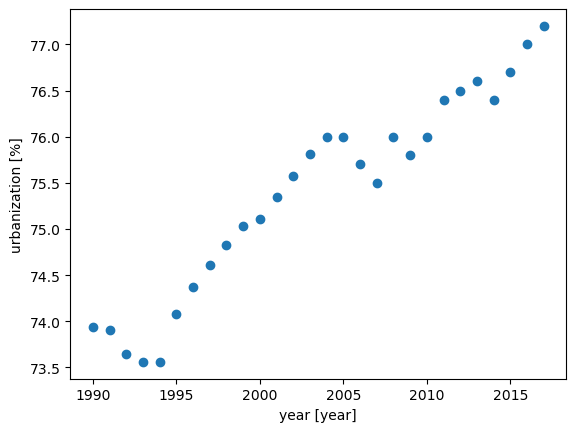

In [335]:
x = list(urban_mean.year)
y = list(urban_mean.urbanization)
plt.scatter(x, y)
plt.xlabel('year [year]')
plt.ylabel('urbanization [%]')

In [336]:
from sklearn.linear_model import LinearRegression
x = np.array(urban_mean['year']).reshape((-1, 1))
y = np.array(urban_mean['urbanization'])
model = LinearRegression().fit(x, y)
urban_mean['urbanization_reg'] = model.predict(x)
urban_mean

,year,urbanization,urbanization_reg
0,1990,73.94,73.670813
1,1991,73.91,73.798848
2,1992,73.65,73.926883
3,1993,73.56,74.054918
4,1994,73.56,74.182953
5,1995,74.08,74.310988
6,1996,74.37,74.439023
7,1997,74.61,74.567058
8,1998,74.83,74.695093
9,1999,75.03,74.823128


Text(0, 0.5, 'urbanization [%]')

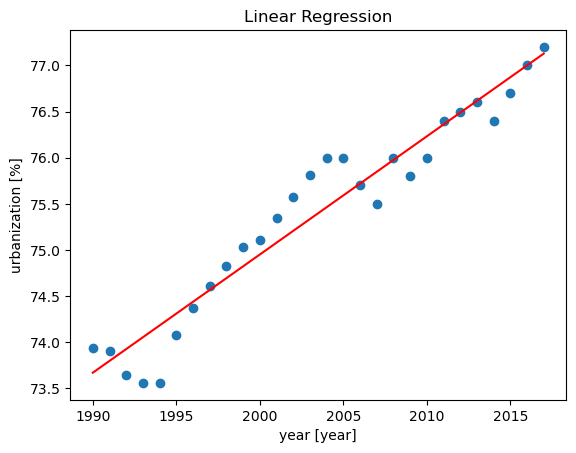

In [337]:
# plt.figure(figsize=(7, 7))

plt.scatter(urban_mean.year, urban_mean.urbanization)

plt.plot(urban_mean.year, urban_mean.urbanization_reg, color = 'red')

plt.title("Linear Regression")
plt.xlabel('year [year]')
plt.ylabel('urbanization [%]')

In [338]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(urban_mean.urbanization, urban_mean.urbanization_reg)) # среднее значение абсолютного значения ошибок. 
# (сумма (каждого Actual и Predicted) разделить на количество)

Mean Absolute Error: 0.22339275940260908


In [339]:
model.coef_

array([0.12803503])

In [340]:
model.intercept_

-181.11889709906956

In [341]:
new_value = [[]]
print("\nПредсказанный npg: ", model.predict([[float(input("\nВведите значение входного параметра " + 'year' + ": "))]]))


Введите значение входного параметра year:  1983



Предсказанный npg:  [72.7745676]
